In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from scipy.stats import norm
from random import sample

In [25]:
rand.seed(4)

Text(0.5, 1.0, 'Original data point with sign function')

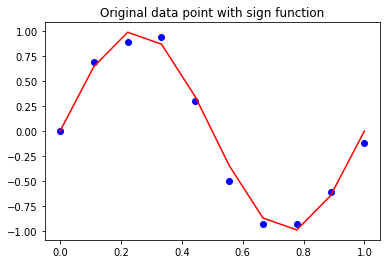

In [26]:
m = 10
x_i = np.linspace(0, 1, m)
target = np.sin(2 * (np.pi) * x)
y_i = np.sin(2 * (np.pi) * x) + np.random.normal(scale = 0.1, size = [x.shape[0]])

x0 = np.ones(m)
phi = np.dstack((x0, x_i))
plt.scatter(x_i, y_i, color = 'blue')
plt.plot(x_i, target, color = 'red')
plt.title('Original data point with sign function')

In [27]:
def Exp_and_Var(x,X,t,sigma):
    pdf_vals = norm.pdf(x - X.reshape(10,1), loc = 0, scale = sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))

    Expectation = (pdf_vals * t.reshape(1,10)).sum(axis = 1)
    Cond_Var = np.sqrt(sigma **2 +  (pdf_vals * t.reshape(1,10) **2).sum(axis = 1) - Expectation **2)
    return Expectation, Cond_Var

Text(0.5, 1.0, 'kernel regression with sigma = 0.1')

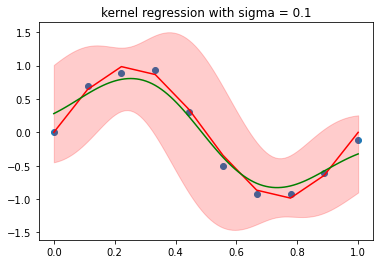

In [28]:
x_test = np.linspace(0, 1, 100)
sigma = 0.1
E,V = Exp_and_Var(x_test, x_i, y_i, sigma)
plt.scatter(x_i, y_i)
plt.plot(x_i, t, color = 'red')
plt.plot(x_test, E, color = 'green')
plt.fill_between(x_test, E - 2 * V, E + 2 * V, alpha = 0.2, color = 'red')
plt.title('kernel regression with sigma = 0.1')